#Project: predicting the level of employee's satisfaction and the quit's likelihood#

*IMPORT DATASETS AND LIBRARIES*

In [ ]:
pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import roc_auc_score

from phik import phik_matrix
from phik.report import plot_correlation_matrix
import shap

In [ ]:
data_train1 = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv')
X_test = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
y_test1 = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv')
data_train2 =  pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv')
y_test2 = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv')

In [ ]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [ ]:
def todoplot(df):
    for i in col:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
        ax1.hist(df[i], bins=10);
        ax1.set_title(i)
        ax1.set_ylabel('quantity')
        ax2.boxplot(df[i]);
        ax2.set_title(i)
        plt.show()

*DATA PREPROCESSING*

In [ ]:
data_train1.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [ ]:
data_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [ ]:
data_train1.duplicated().sum()

0

In [ ]:
data_train1['dept'].sort_values().unique()

array(['hr', 'marketing', 'purchasing', 'sales', 'technology', nan],
      dtype=object)

In [ ]:
data_train1['level'].sort_values().unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [ ]:
data_train1['workload'].sort_values().unique()

array(['high', 'low', 'medium'], dtype=object)

In [ ]:
data_train1['last_year_promo'].sort_values().unique()

array(['no', 'yes'], dtype=object)

In [ ]:
data_train1['last_year_violations'].sort_values().unique()

array(['no', 'yes'], dtype=object)

The training dataset has 4000 rows and 10 columns, with single gaps in the dept and level columns. The data type matches the contents of the columns, no duplicates were identified

In [ ]:
X_test.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [ ]:
X_test.duplicated().sum()

0

In [ ]:
X_test['dept'].sort_values().unique()

array([' ', 'hr', 'marketing', 'purchasing', 'sales', 'technology', nan],
      dtype=object)

In [ ]:
X_test['level'].sort_values().unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [ ]:
X_test['workload'].sort_values().unique()

array([' ', 'high', 'low', 'medium'], dtype=object)

In [ ]:
X_test['last_year_promo'].sort_values().unique()

array(['no', 'yes'], dtype=object)

In [ ]:
X_test['last_year_violations'].sort_values().unique()

array(['no', 'yes'], dtype=object)

The first test dataset has 2000 rows, there are also single gaps in the workload, dept and level columns, the data types in the columns are set correctly, there are no duplicates

In [ ]:
y_test1.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [ ]:
y_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [ ]:
y_test1.duplicated().sum()

0

the first target feature is numeric, there are no duplicates or gapes

In [ ]:
data_train2.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [ ]:
data_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [ ]:
data_train2.duplicated().sum()

0

In [ ]:
data_train2['dept'].sort_values().unique()

array(['hr', 'marketing', 'purchasing', 'sales', 'technology'],
      dtype=object)

In [ ]:
data_train2['level'].sort_values().unique()

array(['junior', 'middle', 'sinior'], dtype=object)

In [ ]:
data_train2['workload'].sort_values().unique()

array(['high', 'low', 'medium'], dtype=object)

In [ ]:
data_train2['last_year_promo'].sort_values().unique()

array(['no', 'yes'], dtype=object)

In [ ]:
data_train2['last_year_violations'].sort_values().unique()

array(['no', 'yes'], dtype=object)

In [ ]:
data_train2['quit'].sort_values().unique()

array(['no', 'yes'], dtype=object)

The second training dataset has 4000 rows, 10 columns, no gaps or duplicates. The data types are correct.

In [ ]:
y_test2.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


In [ ]:
y_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


The second target feature is categorial, there are no duplicates

*Conclusion for the section: the general information about the datasets was assessed, the absence of duplicates and the presence of a small number of gaps was established (we will fill them in in the pipeline). The data types correspond to the content. The target attribute for the first task is numeric, for the second it is categorical.*

**Task 1. Developing a model to predict the level of employee satisfaction based on customer data.**

*EXPLORATORY DATA ANALYSIS*

In [ ]:
data_train1.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


The duration of work of employees in the company varies in the range of 1-10 years with a median of 3 years, the median rating of the quality of work of employees on a scale of 1-5 was 4 - a rather high rating. Employee salaries range from 12000 to 98400  - the spread is very large, the average salary was 34000, the median was 30000, the vast majority of employees receive less than 75000. The average level of job satisfaction was 0.53, median 0.56 with variations from 0.03 to 1.0

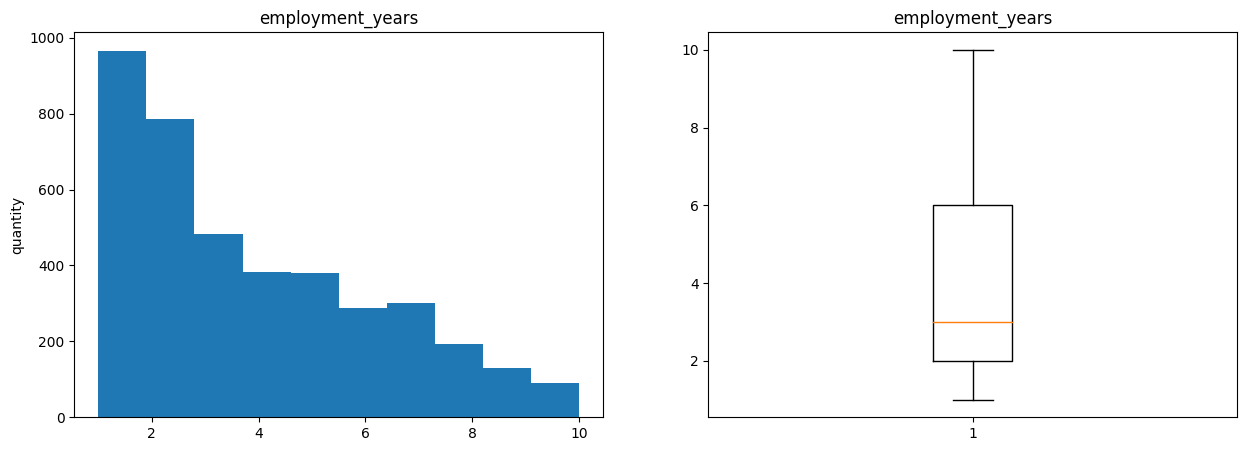

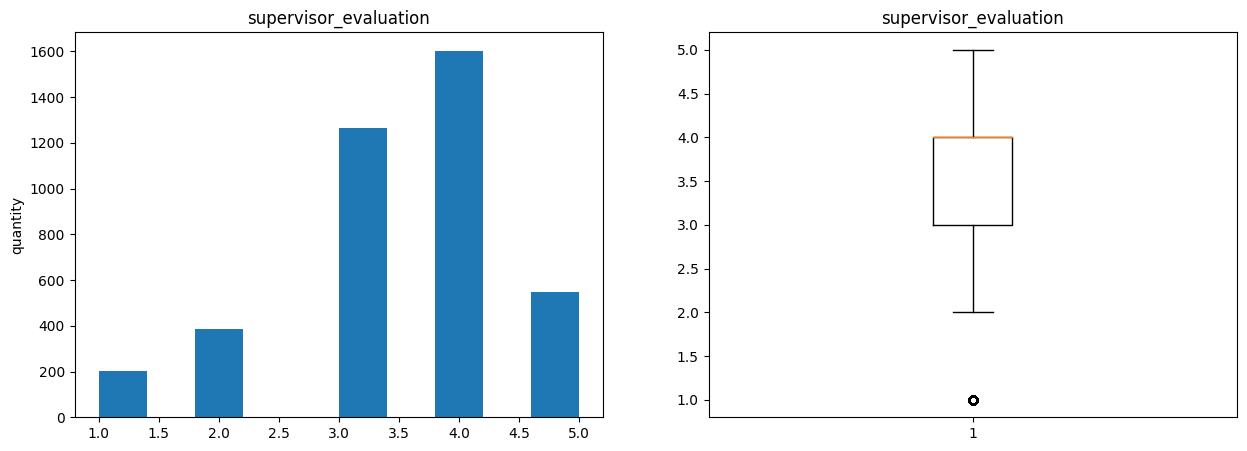

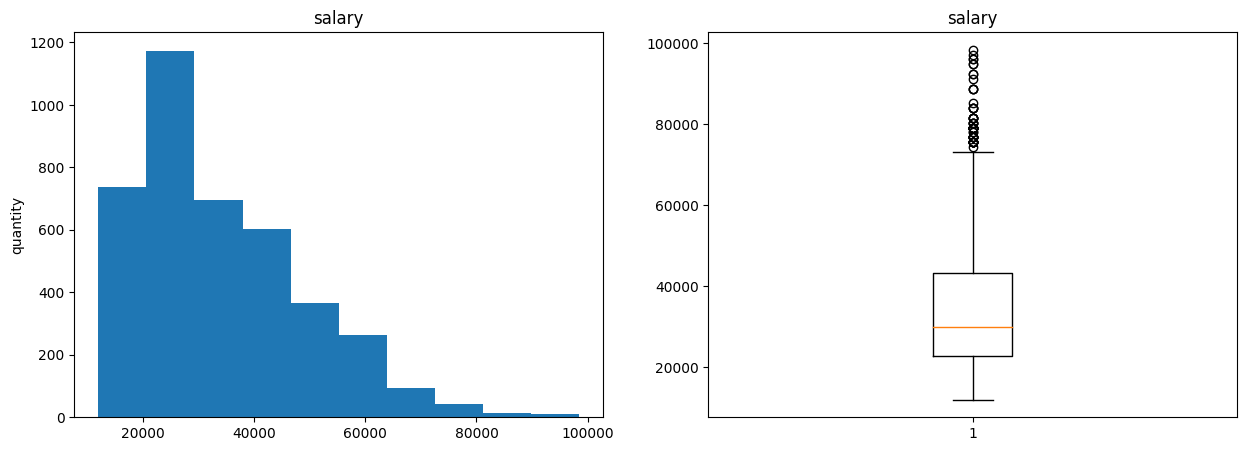

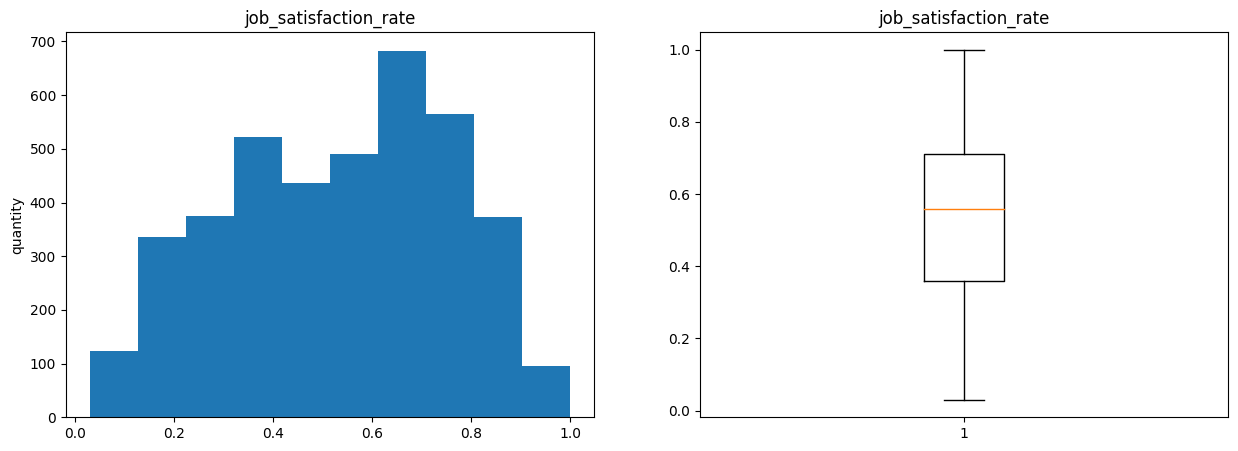

In [ ]:
col = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']
todoplot(data_train1)

judging by the boxplots, there is a single outlier in the results of assessing the quality of work (score 1), a some outliers in the salary data, probably representing the company administration (very high level).
Let's look at the distribution of quality features.

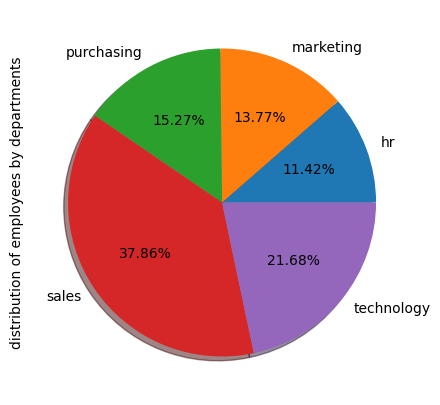

In [ ]:
data_train1.groupby(['dept']).count().plot.pie(y='id', ylabel='distribution of employees by departments', \
                                                 autopct='%1.2f%%', figsize=(5,5), shadow=True)
plt.legend('', frameon=False);

As we can see from the graph, more than 1/3 of the employees work in the sales department, a little more than 1/5 in technology, almost equally in the purchasing and marketing departments, and least of all in HR.

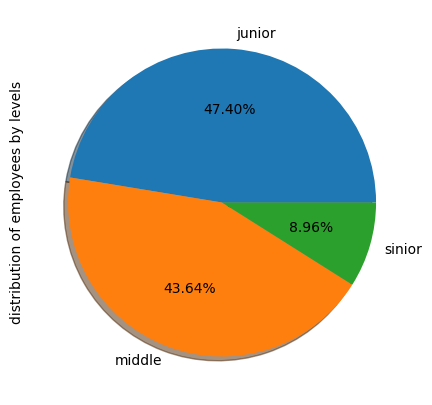

In [ ]:
data_train1.groupby(['level']).count().plot.pie(y='id', ylabel='distribution of employees by levels', \
                                                 autopct='%1.2f%%', figsize=(5,5), shadow=True)
plt.legend('', frameon=False);

the fraction of juniors reach 47,4%, middles - 43,6%, siniors 9%

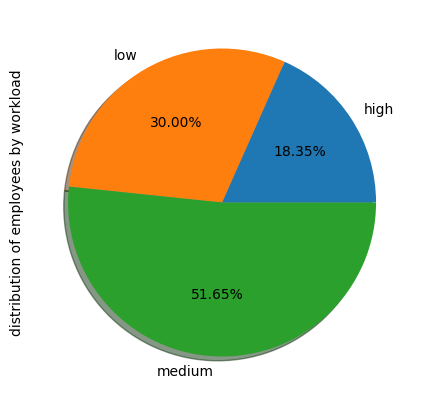

In [ ]:
data_train1.groupby(['workload']).count().plot.pie(y='id', ylabel='distribution of employees by workload', \
                                                 autopct='%1.2f%%', figsize=(5,5), shadow=True)
plt.legend('', frameon=False);

more than half of the employees rated their workload as average, 30% have low workload and less than 1/5 of the share have high workload

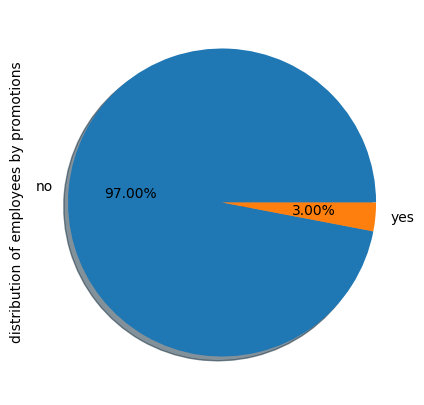

In [ ]:
data_train1.groupby(['last_year_promo']).count().plot.pie(y='id', ylabel='distribution of employees by promotions', \
                                                 autopct='%1.2f%%', figsize=(5,5), shadow=True)
plt.legend('', frameon=False);

only 3% of employees received a promotion in the previous year

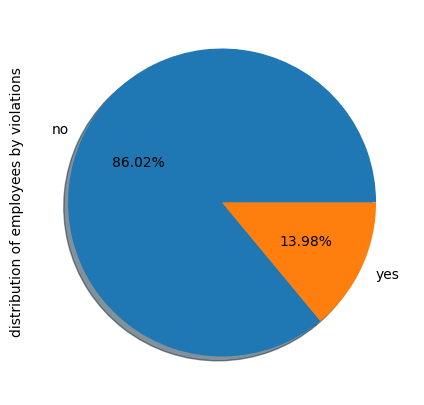

In [ ]:
data_train1.groupby(['last_year_violations']).count().plot.pie(y='id', ylabel='distribution of employees by violations', \
                                                 autopct='%1.2f%%', figsize=(5,5), shadow=True)
plt.legend('', frameon=False);

Almost 14% of employees received any fines or penalties over the previous year

In [ ]:
X_test.describe()

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


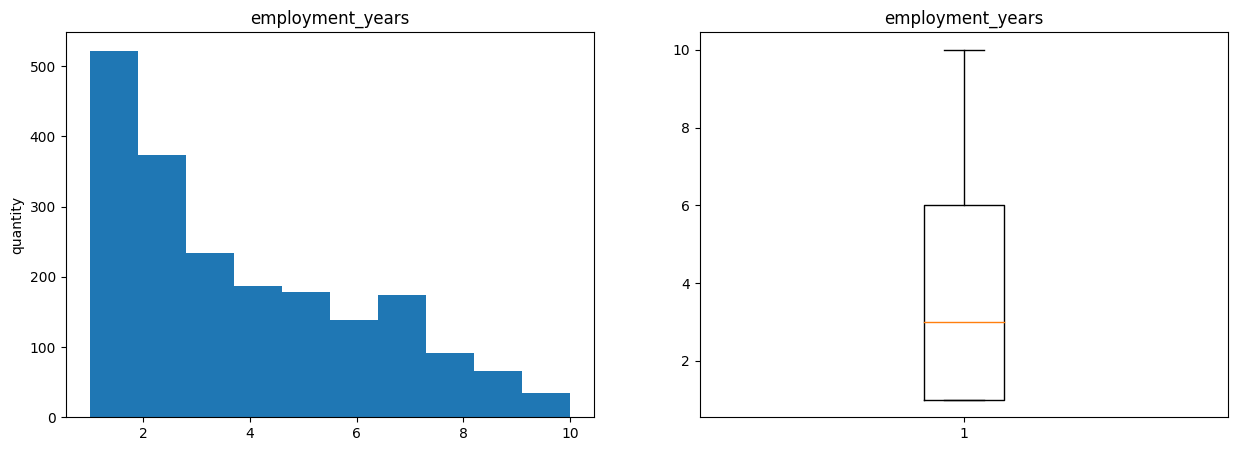

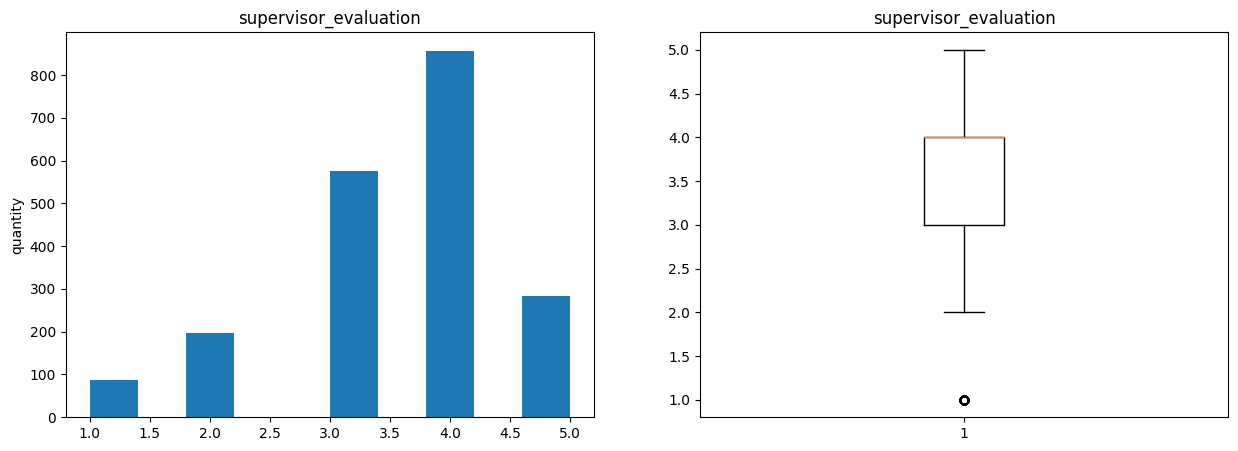

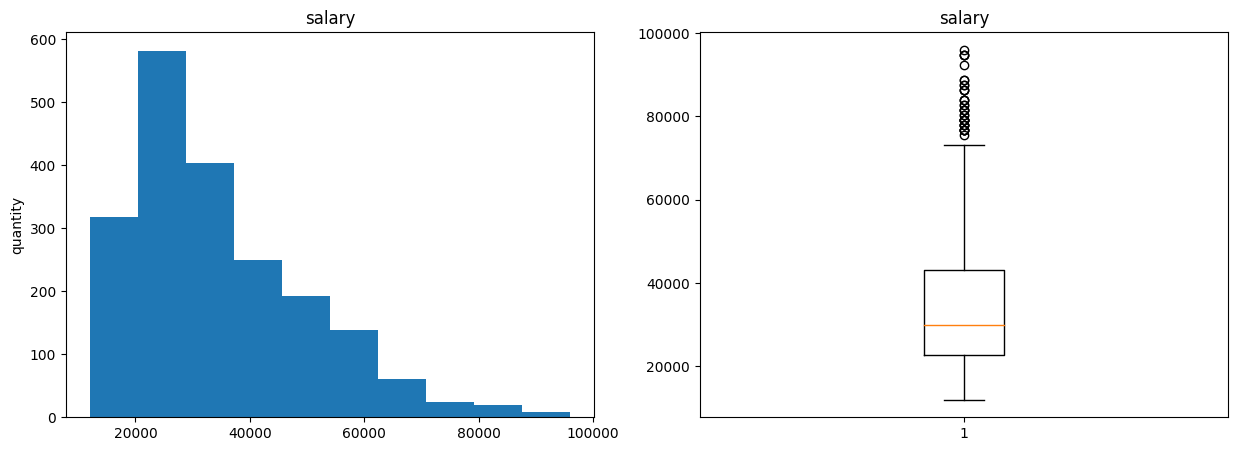

In [ ]:
col = ['employment_years', 'supervisor_evaluation', 'salary']
todoplot(X_test)

In [ ]:
y_test1.describe()

,id,job_satisfaction_rate
count,2000.000000,2000.00000
mean,552765.213500,0.54878
std,253851.326129,0.22011
min,100298.000000,0.03000
25%,339052.000000,0.38000
50%,550793.000000,0.58000
75%,765763.750000,0.72000
max,999029.000000,1.00000


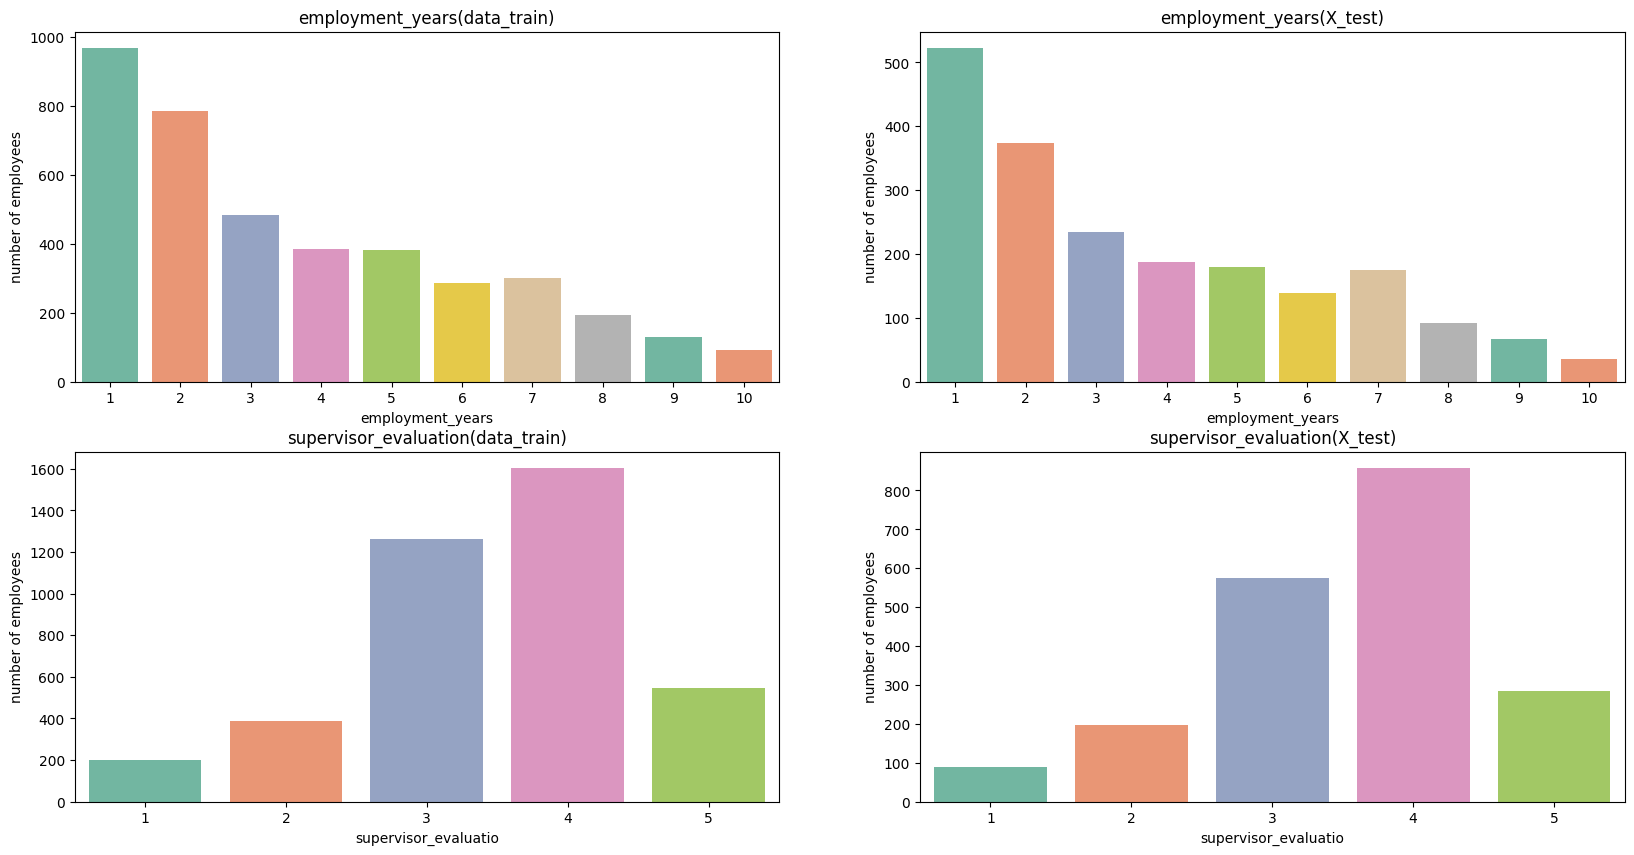

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))


sns.countplot(x='employment_years', data = data_train1, palette = "Set2", hue="employment_years", legend=False, ax=axes[0, 0]).set(title='employment_years\
(data_train)',  xlabel='employment_years',  ylabel='number of employees');
sns.countplot(x='employment_years', data = X_test, palette = "Set2", hue="employment_years", legend=False, ax=axes[0, 1]).set(title='employment_years(X_test)',
                                                                           xlabel='employment_years',  ylabel='number of employees');


sns.countplot( x='supervisor_evaluation', palette = "Set2",hue="supervisor_evaluation", legend=False, data = data_train1,ax=axes[1, 0]).set(title='supervisor_evaluation\
(data_train)', xlabel='supervisor_evaluatio',  ylabel='number of employees');

sns.countplot(x='supervisor_evaluation', data = X_test,  palette = "Set2", hue="supervisor_evaluation", legend=False, ax=axes[1, 1]).set(title='supervisor_evaluation\
(X_test)',  xlabel='supervisor_evaluatio',  ylabel='number of employees');

In the test set the data is almost identical to the train set. The scales of numeric features differ by several orders of magnitude that's why it will be necessary to scale the features (in pipeline).
Let's see how the features of the correlation matrix interact

In [ ]:
tmp=data_train1.set_index('id')

In [ ]:
interval_cols = ['employment_years', 'salary', 'job_satisfaction_rate']
phik_overview = phik_matrix(tmp, interval_cols=interval_cols)

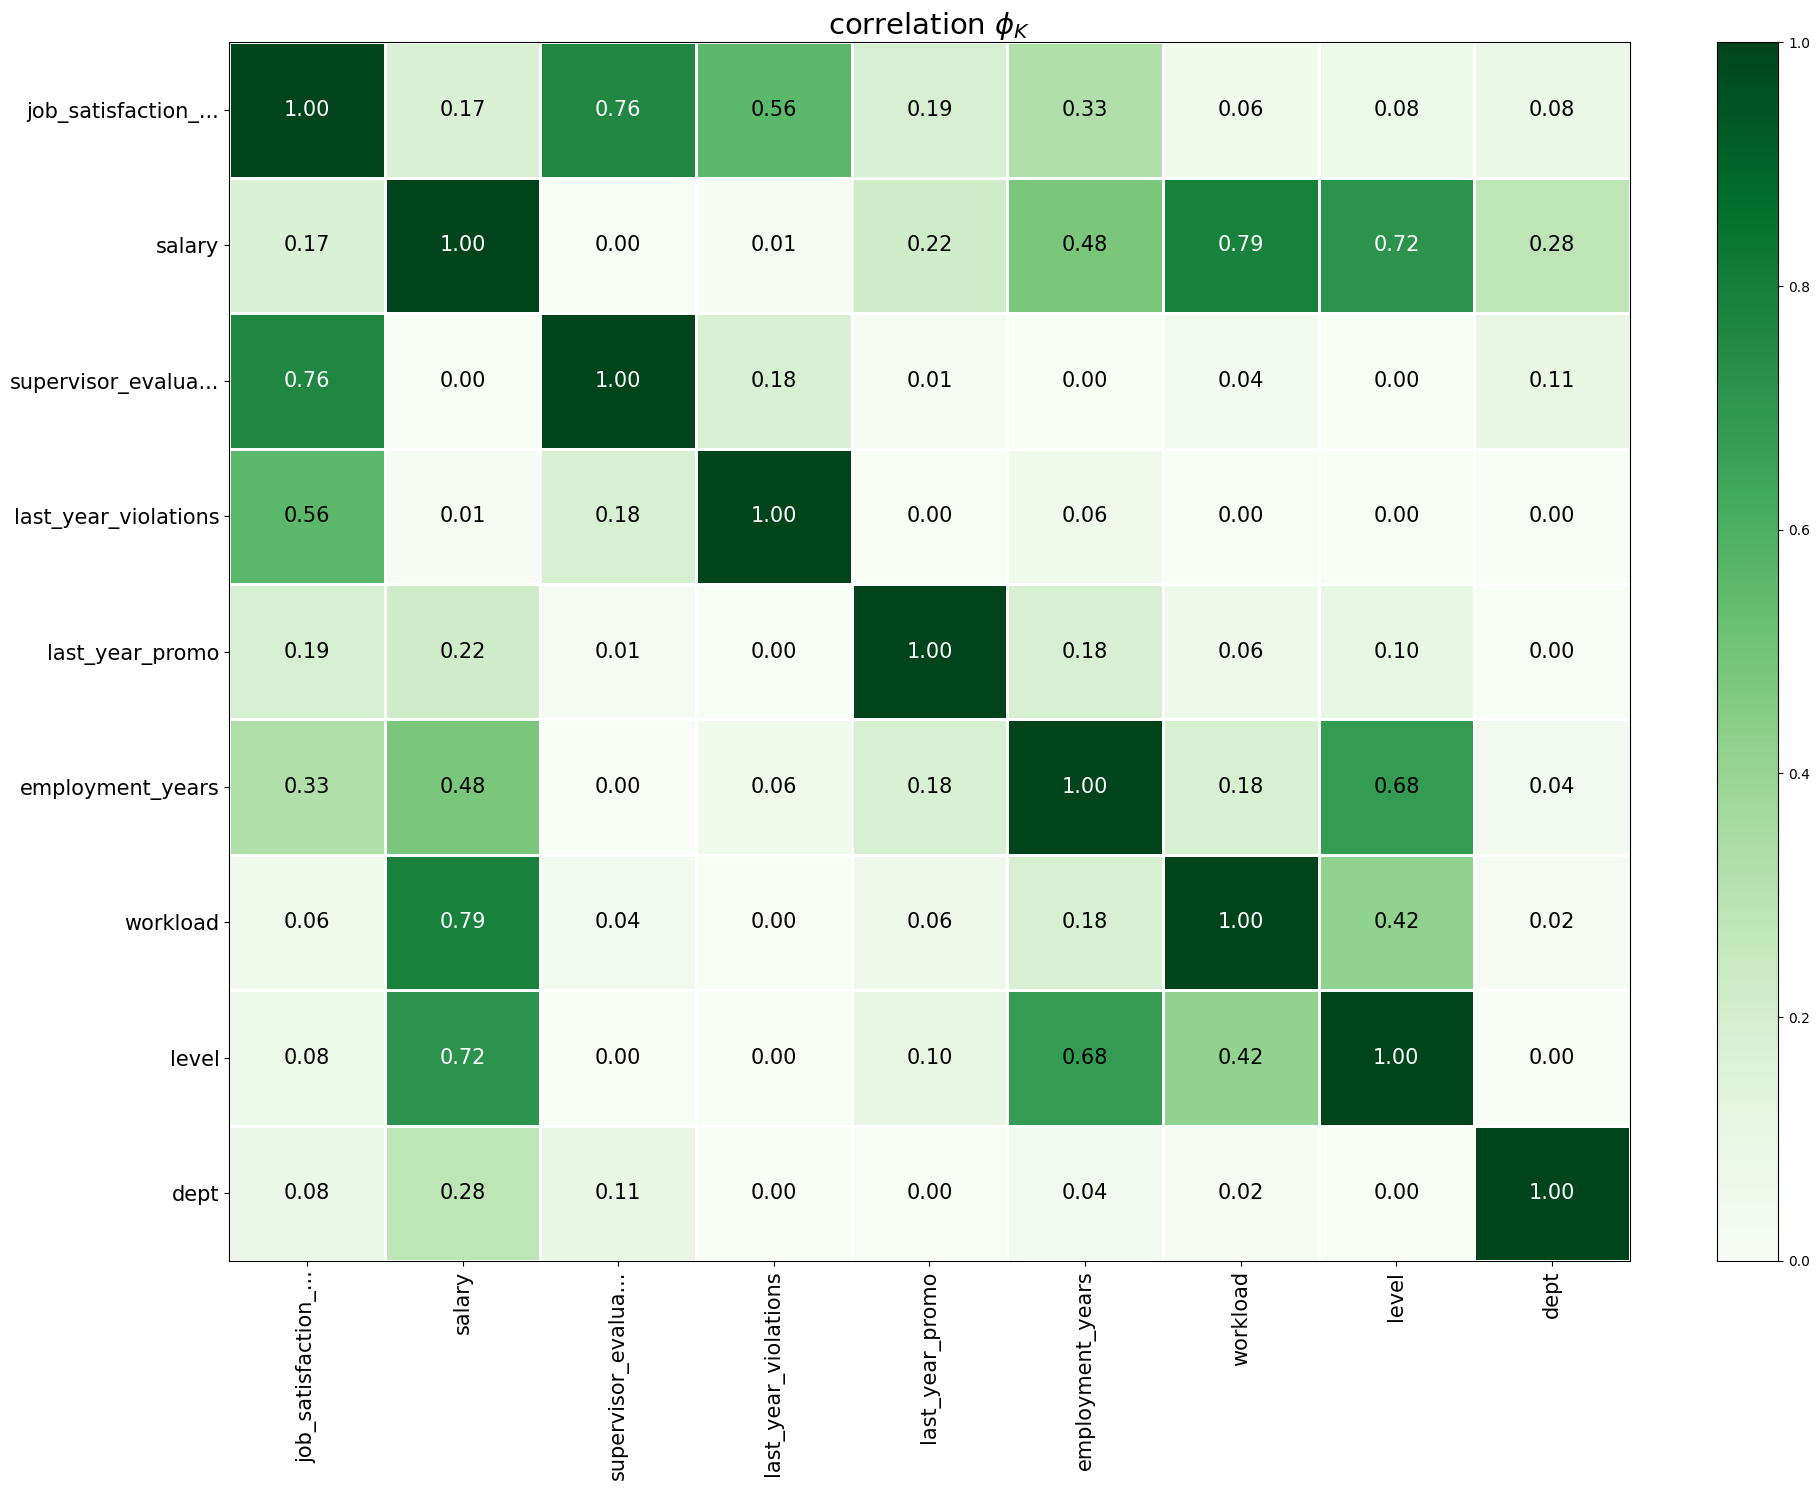

In [ ]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

Judging by the matrix, the job satisfaction indicator correlates with the assessment of the quality of work, the presence of penalties and the duration of work in the company, the correlation with salary and the presence of a promotion is rather weak, with other indicators it is almost zero.

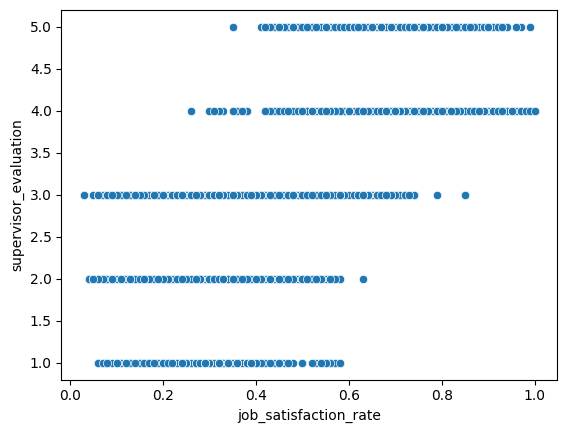

In [ ]:
sns.scatterplot(x='job_satisfaction_rate', y='supervisor_evaluation', data=data_train1);

The scattergram shows that a satisfaction level of more than 0.8 was shown by employees with a work quality rating of 4-5.

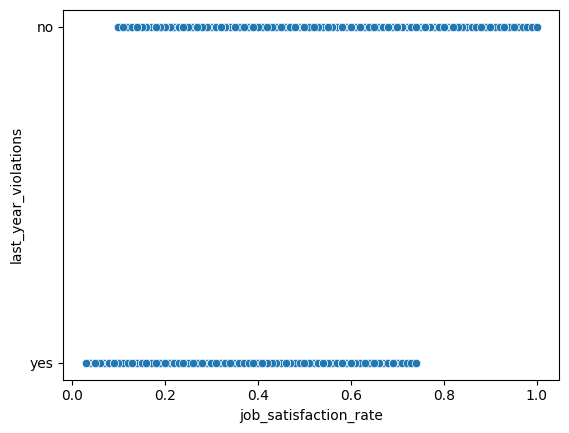

In [ ]:
sns.scatterplot(x='job_satisfaction_rate', y='last_year_violations', data=data_train1);

The maximum level of satisfaction was achieved only among employees without penalties.

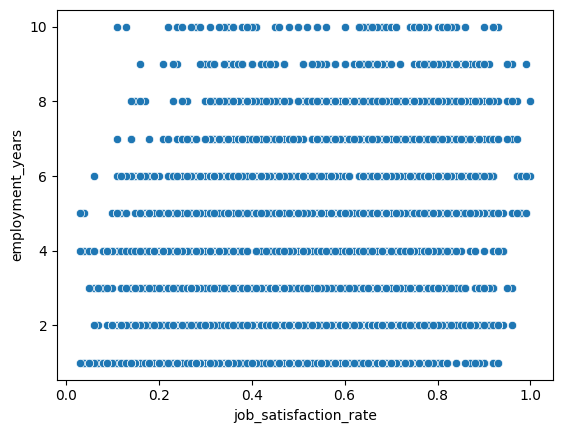

In [ ]:
sns.scatterplot(x='job_satisfaction_rate', y='employment_years', data=data_train1);

The highest level of satisfaction is shown by employees who have worked for the company for 5 or more years.

*Conclusions on the section.*

1. A research analysis of the data was carried out, it was found that the duration of work of employees in the company varies in the range of 1-10 years with a median of 3 years, the median rating of the quality of work of employees on a scale of 1-5 was 4 - a rather high rating. Employee salaries range from 12000 to 98400 - the spread is very large, the average salary was 34000, the median was 30000, the vast majority of employees receive less than 75000. The average level of job satisfaction was 0.53, the median was 0.56, with variations from 0.03 to 1.0.

2. More than 1/3 of the employees work in the sales department, a little more than 1/5 of the technology team, almost equally in the purchasing and marketing departments, and least of all in HR. Juniors account for 47.4%, emploees at middle position 43.6%, and almost 9% have high status (siniors). More than half of the employees rated their workload as average, 30% have low workload and less than 1/5 have high workload. Only 3% of employees received a promotion in the previous year. Almost 14% of employees received any fines or penalties over the previous year.

3. Analysis of the correlation matrix showed that the level of job satisfaction correlates with the assessment of job quality (a satisfaction level of more than 0.8 was shown by employees with a job quality assessment of 4-5), the presence of penalties (the maximum level of satisfaction was achieved only among employees without penalties) and the duration of work in the company (the maximum level of satisfaction is shown by employees who have worked in the company for 5 years or more), the correlation with salary and the presence of an increase in the previous year is quite weak, with other indicators it is almost zero.

*4. DATA PREPARATION*

To complete the first task, we will apply the regression method, because the target attribute is numeric. Linear regression models and decision tree regressor are suitable for this purpose.

As a first step we check the training set for duplicates and remove them to speed up the models, then divide the dataset into X_train and y_train

In [ ]:
data_train1_temp = data_train1.drop(['id'], axis=1)
print('number of duplicates:',data_train1_temp.duplicated().sum())

number of duplicates: 245


In [ ]:
data_train1_temp = data_train1_temp.drop_duplicates().reset_index(drop=True)

In [ ]:
X_train = data_train1_temp.drop(['job_satisfaction_rate'], axis=1)
y_train = data_train1_temp['job_satisfaction_rate']

In [ ]:
X_train.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,sales,junior,medium,2,no,no,1,24000
1,hr,junior,high,2,no,no,5,38400
2,sales,junior,low,1,no,no,2,12000
3,technology,junior,low,4,no,no,2,18000
4,hr,junior,medium,1,no,no,3,22800


In [ ]:
X_train.shape

(3755, 8)

The second step is to prepare the test characteristics - connect X_test and y_test by id and then divide again

In [ ]:
test_all = X_test.merge(y_test1, on='id')
test_all.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79
1,686555,hr,junior,medium,1,no,no,4,30000,0.72
2,467458,sales,middle,low,5,no,no,4,19200,0.64
3,418655,sales,middle,low,6,no,no,4,19200,0.60
4,789145,hr,middle,medium,5,no,no,5,40800,0.75


In [ ]:
X_test = test_all.drop(['job_satisfaction_rate'], axis=1)
X_test.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [ ]:
y_test  = test_all['job_satisfaction_rate']
y_test.head()

0    0.79
1    0.72
2    0.64
3    0.60
4    0.75
Name: job_satisfaction_rate, dtype: float64

The next step is making of metric SMAPE (symmetric mean absolute percentage error), in the numerator of which there will be the difference between the actual and predicted values ​​of the target attribute, in the denominator their sum divided by 2, the result of the division is expressed as a percentage. Success criterion - metric value less than/equal to 15

In [ ]:
def smape(y_true, y_pred):
    return 100 * np.mean(np.abs(y_pred - y_true) / ((np.abs(y_pred) + np.abs(y_true))/2))

In [ ]:
smape_scorer = make_scorer(smape, greater_is_better=False)

Now we divide the columns into 3 groups - categorical, rank and numeric, and set encoding and scaling parameters for them. For rank characteristics we use OrdinalEncoder, for other categorical ones OneHotEncoder. We combine them into a preprocessor

In [ ]:
ohe_cols = [ 'last_year_promo', 'last_year_violations']
ordered_cols = ['dept', 'level', 'workload']
num_cols = ['employment_years', 'supervisor_evaluation', 'salary']

In [ ]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe',
            OneHotEncoder(drop='first', handle_unknown='error')
        )
    ]
)

In [ ]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                   ['hr', 'marketing', 'purchasing', 'sales', 'technology'],
                   ['junior', 'middle', 'sinior'],
                   ['low', 'medium', 'high'],
                ],
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [ ]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_cols),
        ('ord', ord_pipe, ordered_cols),
        ('num', MinMaxScaler(), num_cols)
    ],
    remainder='passthrough'
)

Data preparation has been completed. Next ster is the full pipeline

*PIPELINE*

In [ ]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

In [ ]:
param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__min_samples_leaf': range(7,14),
        'models__max_depth': range(7,14)
    },
    {
        'models': [LinearRegression()]
    } ,
    {
        'models': [SVR(kernel = 'linear')],
        'models__C': range(2,4)
    }
                 ]

In [ ]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring=smape_scorer,
    n_jobs=-1
)

In [ ]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                SimpleImpu...
                                              DecisionTreeRegressor(random_state=42))]),
                   n_jobs=-1,
                   param_distributions=[{'models': [DecisionTreeRegressor(max_depth=12,
                                                                          min_samples_leaf=7,
                                                                          random_state=42)],
                                         'models__max_depth': range(7, 14),
                                         'models__min_samples_leaf': range(7, 14)},
                                        {'models': [LinearRegression()]},
                                        {'models': [SVR(kernel='linear')],
                                         'models__C': range(2, 4)}],
                   scoring=make_scorer(smape, greater_is_better=False))

Print the results of all models

In [ ]:
res = pd.DataFrame(randomized_search.cv_results_)
res = res.drop (['mean_fit_time','std_fit_time','mean_score_time',
                 'std_score_time','params','split0_test_score','split1_test_score',
                 'split2_test_score','split3_test_score','split4_test_score','std_test_score'], axis=1)
res.mean_test_score = res.mean_test_score * -1
res

,param_models__min_samples_leaf,param_models__max_depth,param_models,mean_test_score,rank_test_score
0,11,8,"DecisionTreeRegressor(max_depth=12, min_sample...",17.362042,10
1,13,12,"DecisionTreeRegressor(max_depth=12, min_sample...",16.471366,6
2,9,11,"DecisionTreeRegressor(max_depth=12, min_sample...",16.204640,2
3,9,10,"DecisionTreeRegressor(max_depth=12, min_sample...",16.363105,5
4,8,9,"DecisionTreeRegressor(max_depth=12, min_sample...",16.892213,8
5,7,12,"DecisionTreeRegressor(max_depth=12, min_sample...",15.903435,1
6,12,11,"DecisionTreeRegressor(max_depth=12, min_sample...",16.325696,4
7,7,9,"DecisionTreeRegressor(max_depth=12, min_sample...",16.766606,7
8,11,12,"DecisionTreeRegressor(max_depth=12, min_sample...",16.226977,3
9,7,8,"DecisionTreeRegressor(max_depth=12, min_sample...",17.285013,9


In [ ]:
print('The best model and its parameters:\n\n', randomized_search.best_estimator_)
print ('The metric of the best model on cross-validation:', randomized_search.best_score_*-1)

The best model and its parameters:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                   

The best model is DecisionTreeRegressor(max_depth=12, min_samples_leaf=7). The metric of the best model on cross-validation: 15.9034. Now we test the best model on the test dataset.

In [ ]:
best_model = randomized_search.best_estimator_
best_params = randomized_search.best_params_

y_pred_test = randomized_search.best_estimator_.predict(X_test)
smape_test = smape(y_test, y_pred_test)

print ("SMAPE on test set is:", smape_test)

SMAPE on test set is: 14.54905149605589


SMAPE-level on the test set is 14.5490, what meets the success criterion, it means we can use our model for getting forecast of emploee's satisfaction.

**Task 2. Predicting employee quit**

*EXPLORATORY DATA ANALYSIS. DRAWINGUP A PORTRAIT OF A RESIGNED EMPLOYEE*

In [ ]:
data_train2.describe()

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


In [ ]:
data_train2.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [ ]:
tmp2=data_train2.set_index('id')

In [ ]:
interval_cols = ['employment_years', 'salary']
phik_overview = phik_matrix(tmp2, interval_cols=interval_cols)

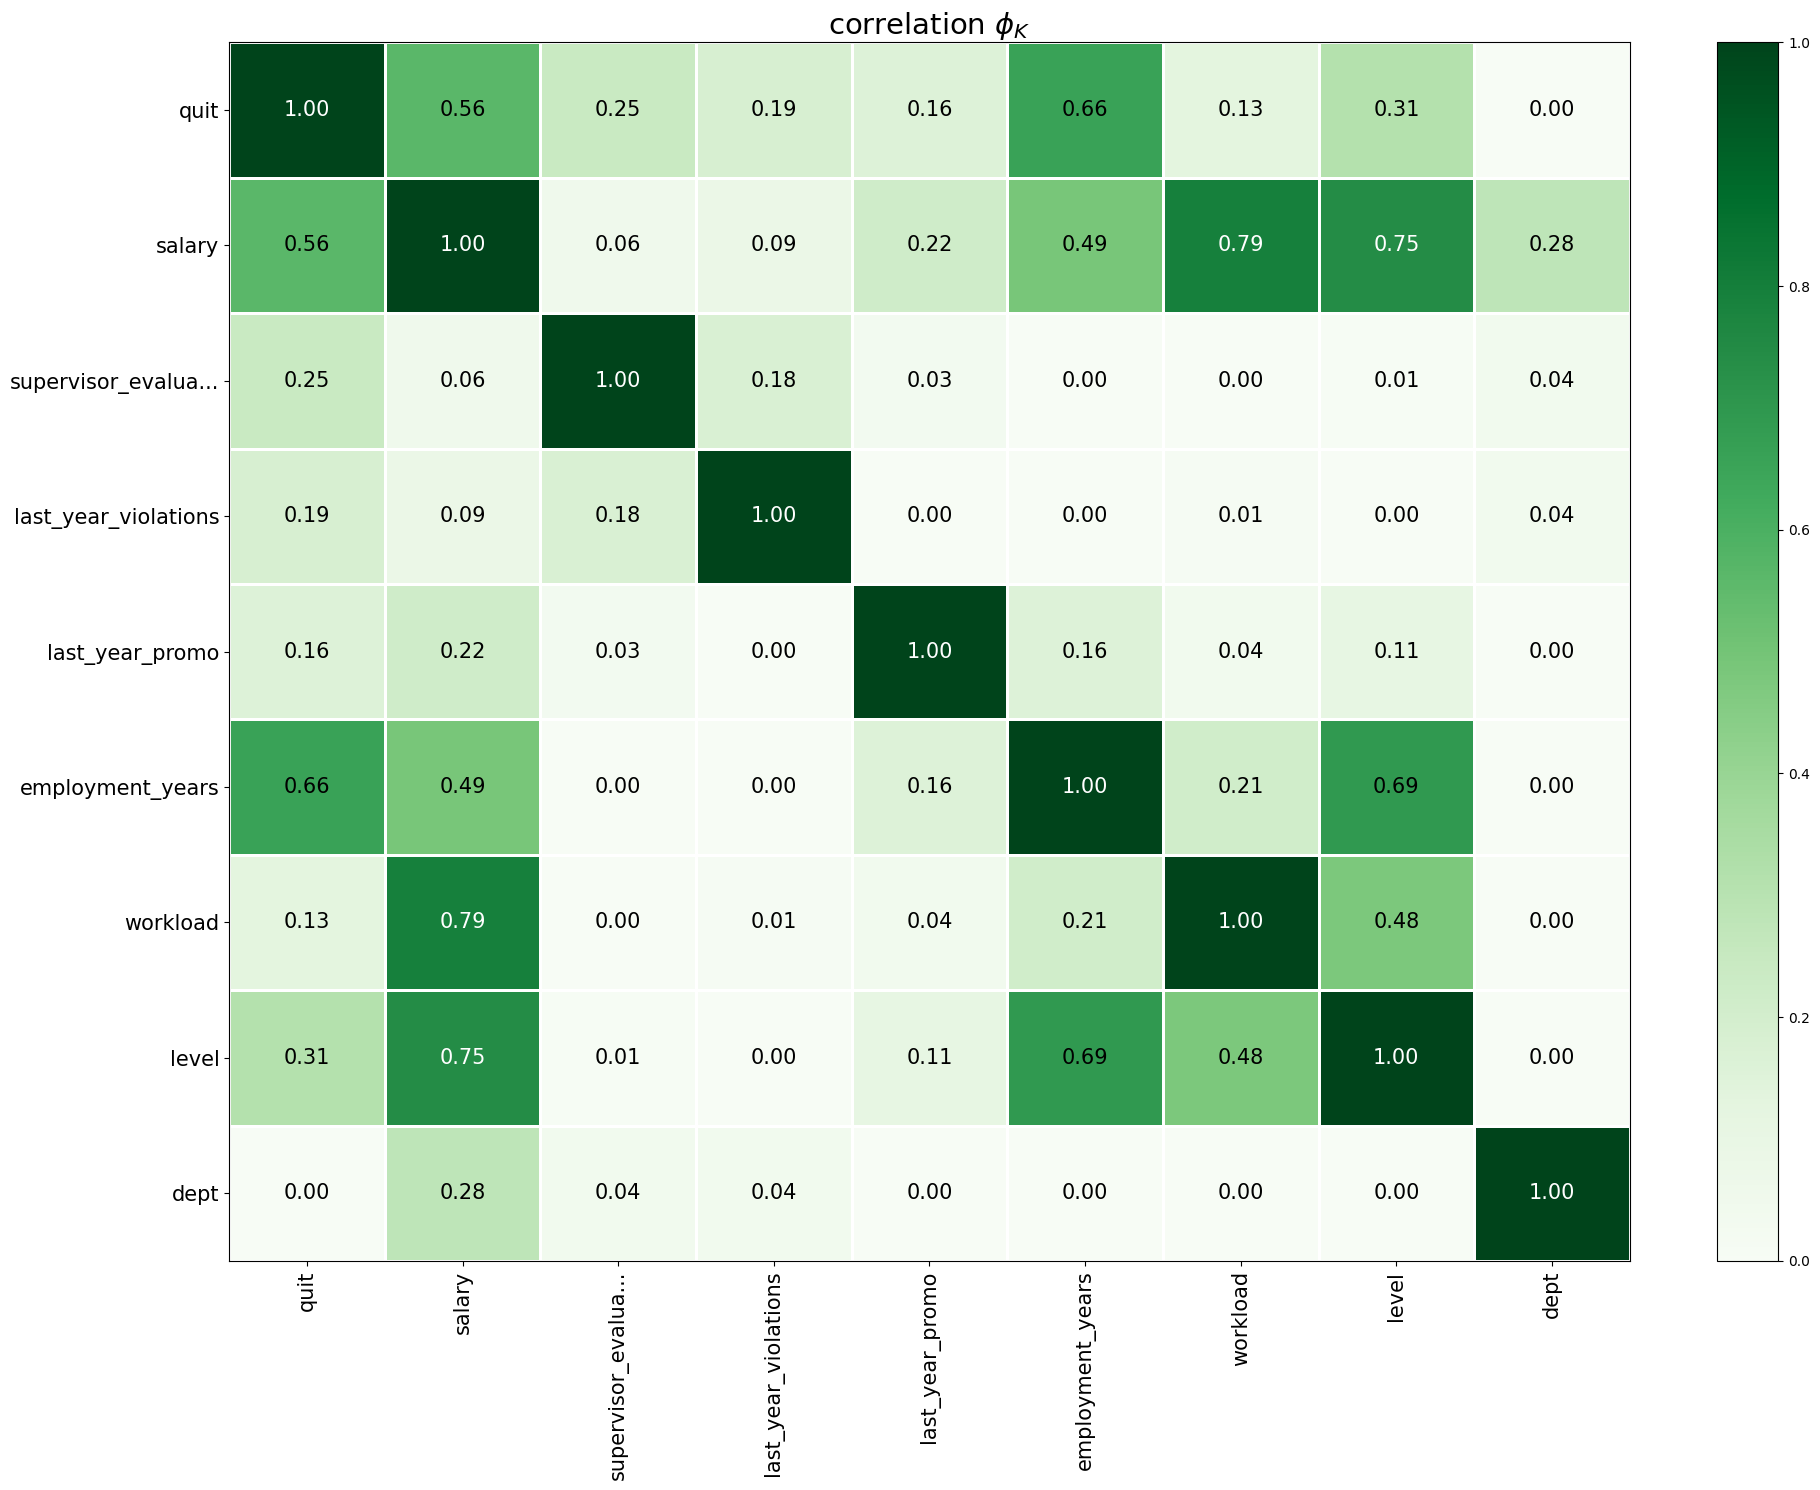

In [ ]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

The quit of employees significantly correlates with such factors as employment years, moderately correlates with level, and with other signs the correlation is weak

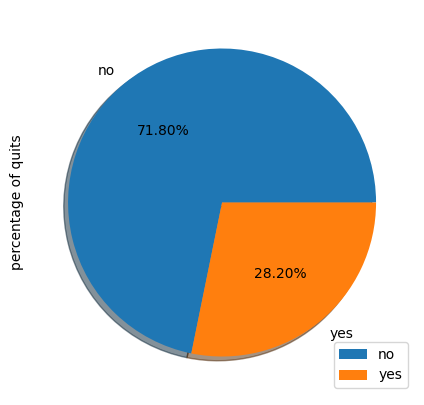

In [ ]:
data_train2.groupby(['quit']).count().plot.pie(y='id', ylabel='percentage of quits', \
                                                 autopct='%1.2f%%', figsize=(5,5), shadow=True)
plt.legend(loc='lower right');

more than a quarter of employees in company quit, that deserves detailed analysis

In [ ]:
t = data_train2.query('quit=="yes"').pivot_table(index='dept', values='id', aggfunc='count')
t1 = data_train2.query('quit=="no"').pivot_table(index='dept', values='id', aggfunc='count')


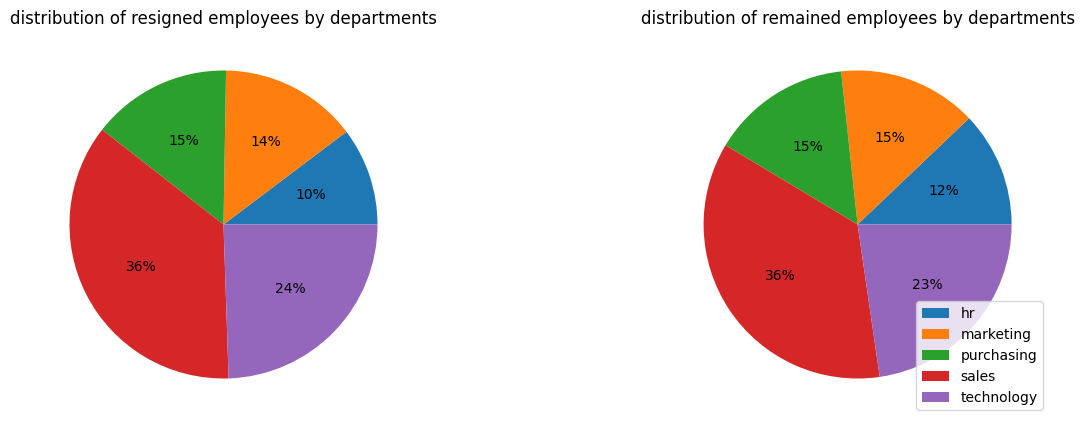

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.pie(data=t, x='id',  autopct='%1.0f%%')
ax1.set_title('distribution of resigned employees by departments')
ax2.pie(data=t1, x='id', autopct='%1.0f%%')
ax2.set_title('distribution of remained employees by departments')
plt.legend(('hr', 'marketing', 'purchasing', 'sales', 'technology'))
plt.show()

  we can see in the graphs that the distribution of quitting and remaining employees in departments is the same

In [ ]:
t2 = data_train2.query('quit=="yes"').pivot_table(index='level', values='id', aggfunc='count')
t3 = data_train2.query('quit=="no"').pivot_table(index='level', values='id', aggfunc='count')

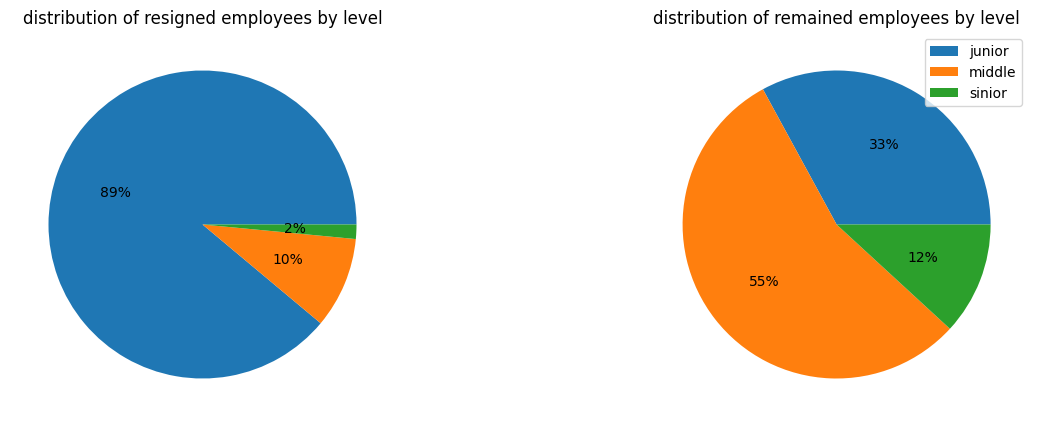

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.pie(data=t2, x='id',  autopct='%1.0f%%')
ax1.set_title('distribution of resigned employees by level')
ax2.pie(data=t3, x='id', autopct='%1.0f%%')
ax2.set_title('distribution of remained employees by level')
plt.legend(('junior', 'middle', 'sinior'))
plt.show()

almost 90% of the employees who left were on junior level, about 10% were middle and only 2% were senior; the difference in status with those who remained was noticeable

In [ ]:
t4 = data_train2.query('quit=="yes"').pivot_table(index='workload', values='id', aggfunc='count')
t5 = data_train2.query('quit=="no"').pivot_table(index='workload', values='id', aggfunc='count')

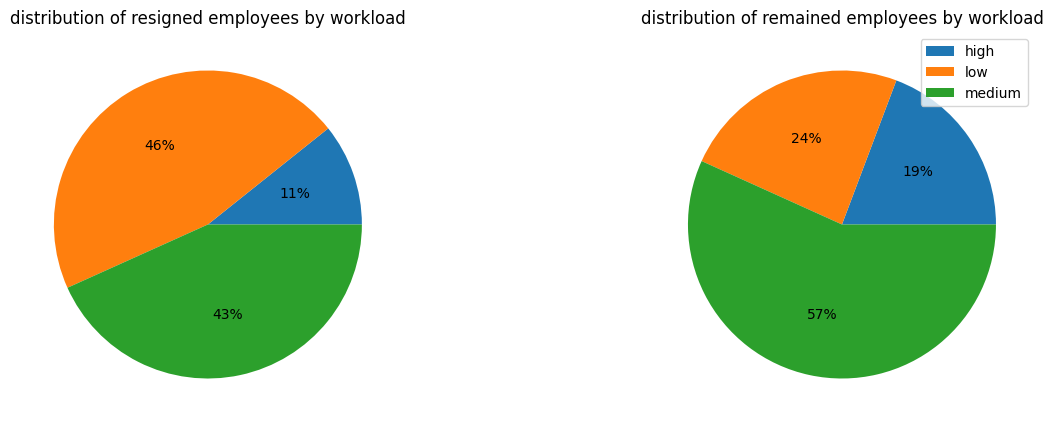

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.pie(data=t4, x='id',  autopct='%1.0f%%')
ax1.set_title('distribution of resigned employees by workload')
ax2.pie(data=t5, x='id', autopct='%1.0f%%')
ax2.set_title('distribution of remained employees by workload')
plt.legend(('high', 'low', 'medium'))
plt.show()

 employees with low workload clearly have a tendency to quit (their share among those who quit is 46%, among the remaining 24%), moderately loaded and highly loaded employees quit infrequently

In [ ]:
t6 = data_train2.query('quit=="yes"').pivot_table(index='last_year_promo', values='id', aggfunc='count')
t7 = data_train2.query('quit=="no"').pivot_table(index='last_year_promo', values='id', aggfunc='count')

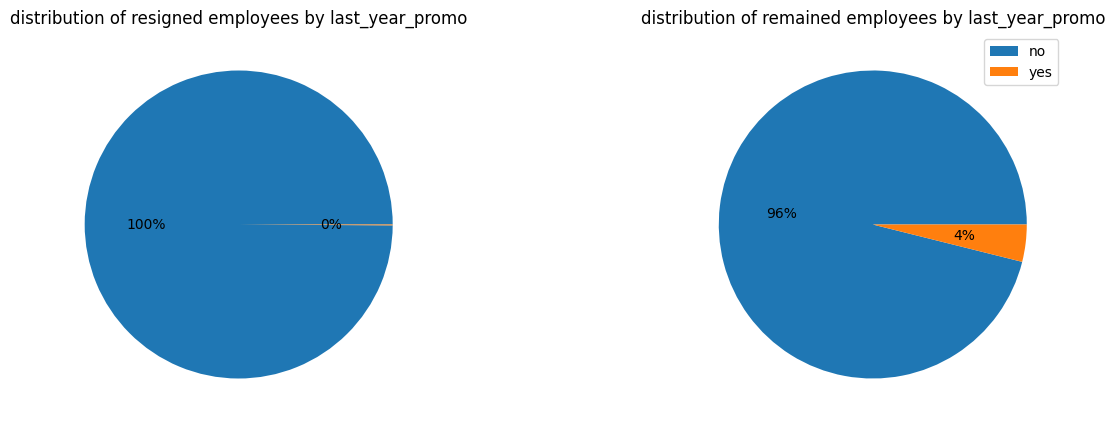

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.pie(data= t6, x='id',  autopct='%1.0f%%')
ax1.set_title('distribution of resigned employees by last_year_promo')
ax2.pie(data= t7, x='id', autopct='%1.0f%%')
ax2.set_title('distribution of remained employees by last_year_promo')
plt.legend(('no', 'yes'))
plt.show()

None of those who left were promoted last year. All those employees who received a promotion remained working in the company

In [ ]:
t8 = data_train2.query('quit=="yes"').pivot_table(index='last_year_violations', values='id', aggfunc='count')
t9 = data_train2.query('quit=="no"').pivot_table(index='last_year_violations', values='id', aggfunc='count')

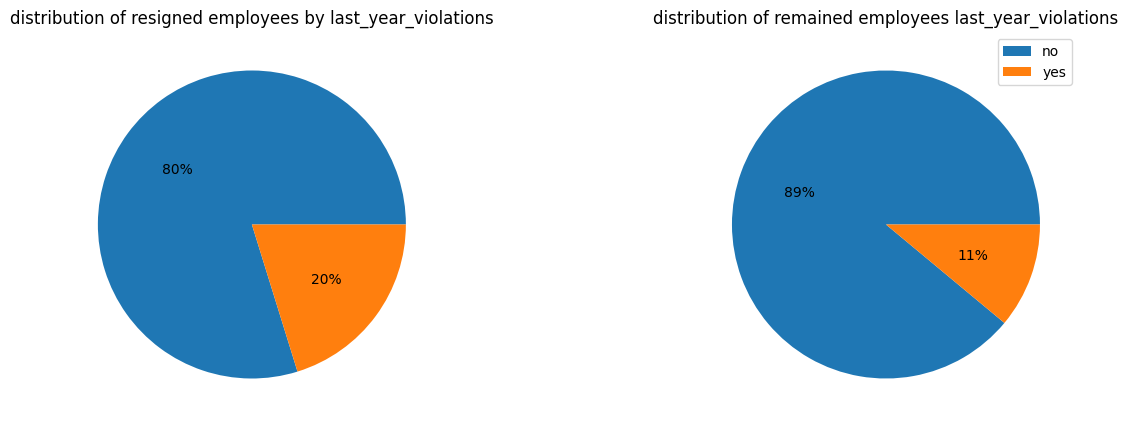

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.pie(data= t8, x='id',  autopct='%1.0f%%')
ax1.set_title('distribution of resigned employees by last_year_violations')
ax2.pie(data= t9, x='id', autopct='%1.0f%%')
ax2.set_title('distribution of remained employees last_year_violations')
plt.legend(('no', 'yes'))
plt.show()

Among the resigned employees, 1/5 were employees who received penalties; among the remaining employees, approximately 1/9

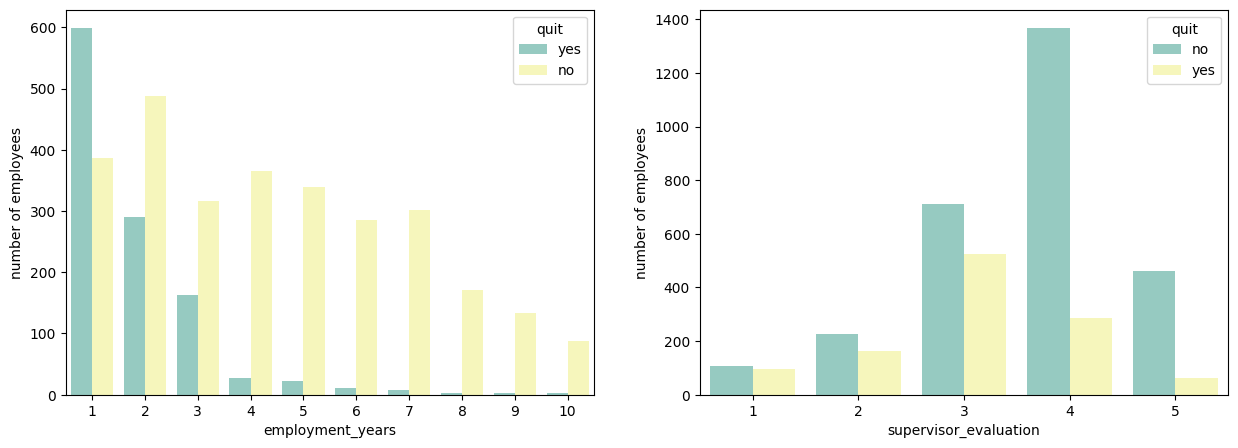

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x ='employment_years', data = data_train2, ax=ax1, hue = 'quit',
              palette = "Set3").set(xlabel='employment_years', ylabel='number of employees');
sns.countplot(x ='supervisor_evaluation', data = data_train2, ax=ax2, hue = 'quit',
              palette = "Set3").set(xlabel='supervisor_evaluation', ylabel='number of employees');

the dynamics of quits is inversely proportional to the employment years in the company - people with 1 year of experience leave the most, with each subsequent year their number decreases, after 5 years of work the number of quits is close to 0. Supervisor evaluation 3 and 4 were the most common among quitting employees, when assessing 5 the number of quits is minimal.

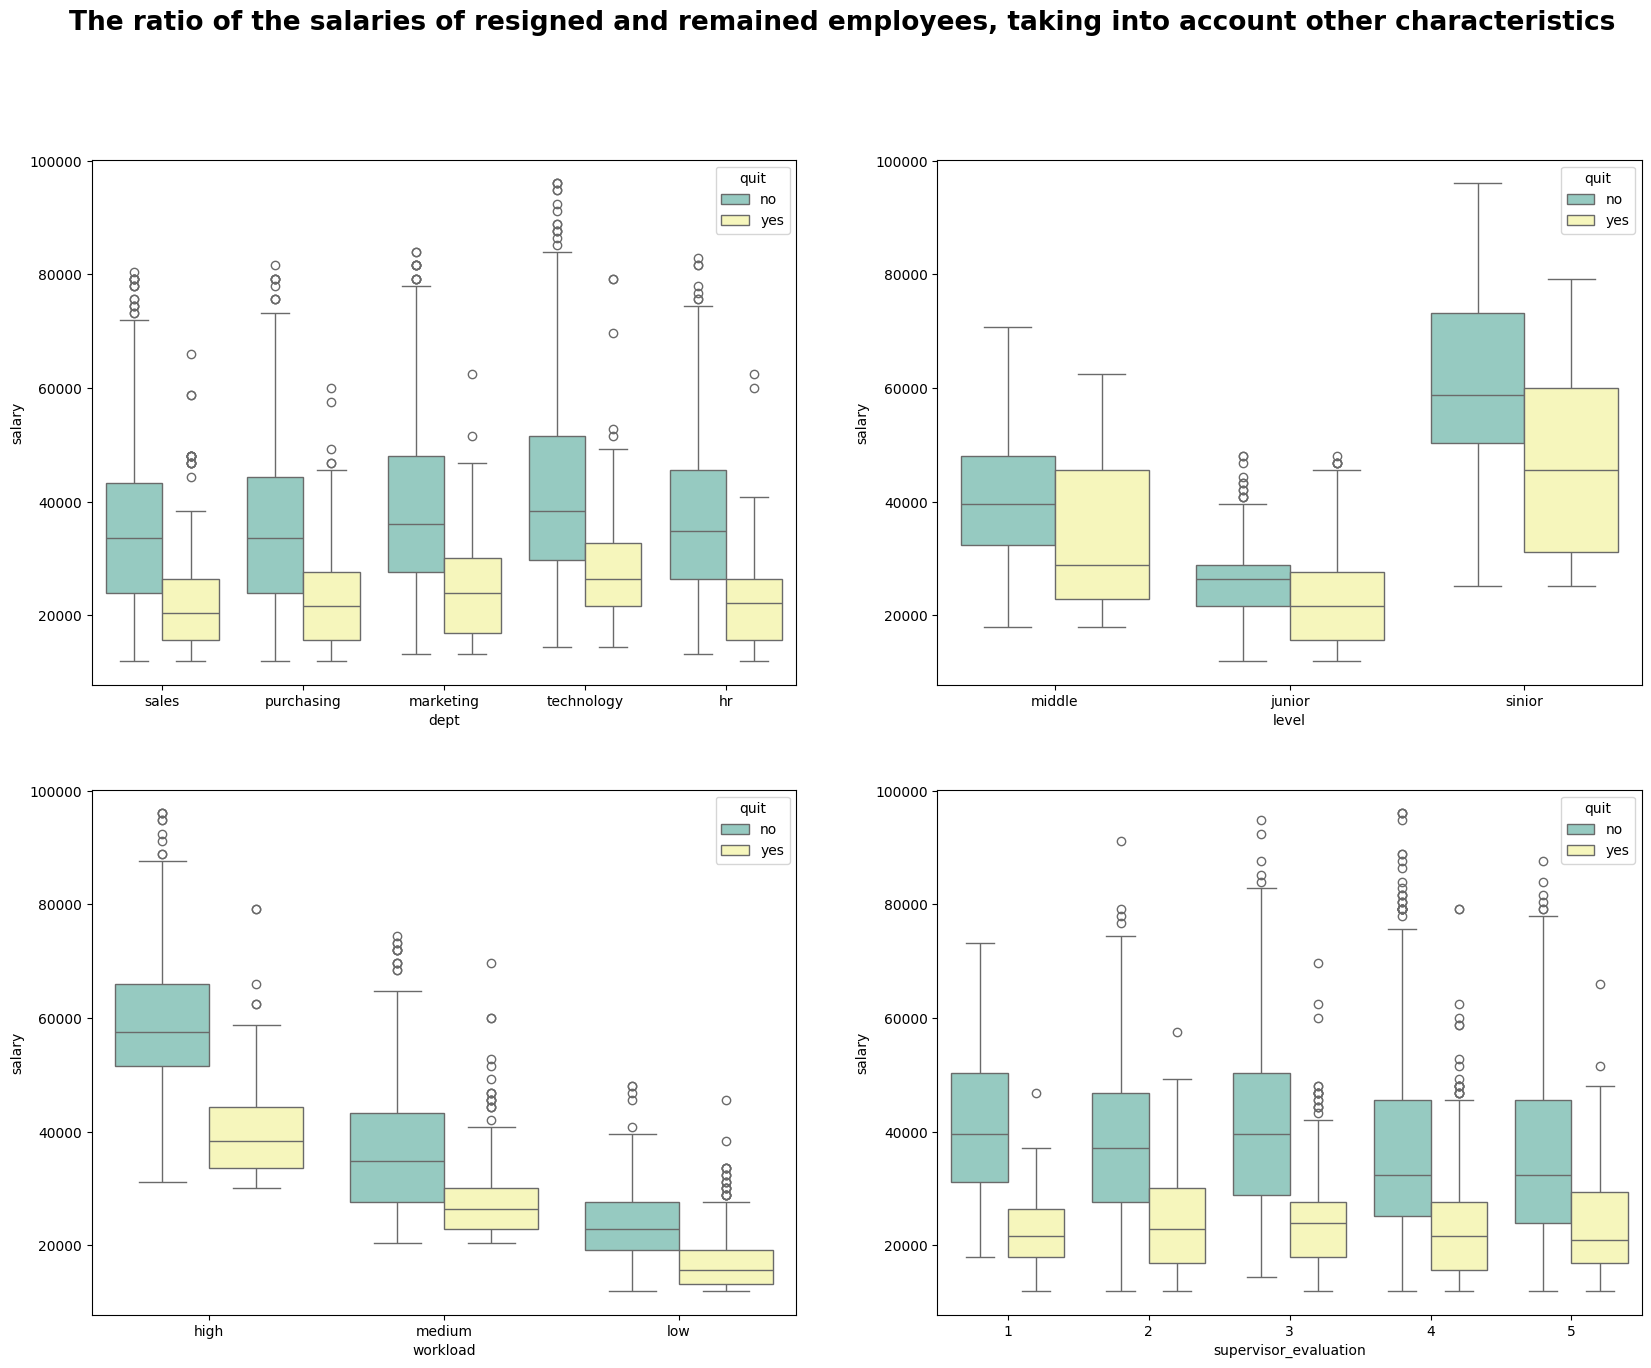

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,15))
plt.suptitle('The ratio of the salaries of resigned and remained employees, taking into account other characteristics', fontsize=19, fontweight='bold')
sns.boxplot(x='dept', y='salary', hue='quit', palette='Set3', data=data_train2,
            ax=axes[0,0]).set(xlabel='dept', ylabel='salary');
sns.boxplot(x='level', y='salary', hue='quit', palette='Set3',
            data=data_train2, ax=axes[0,1]).set(xlabel='level', ylabel='salary');
sns.boxplot(x='workload', y='salary', hue='quit', palette='Set3',
            data=data_train2, ax=axes[1,0]).set(xlabel='workload', ylabel='salary');
sns.boxplot(x='supervisor_evaluation', y='salary', hue='quit', palette='Set3',
            data=data_train2, ax=axes[1,1]).set(xlabel='supervisor_evaluation', ylabel='salary');

The graphs show that the median salary of employees who quit in all groups was lower than that of those who remained. Assessing the distribution of salaries by departments, we see that for technologists the salary is slightly higher than in other departments, the lowest in the sales department, there is also a noticeable spread of salaries depending on level (the highest for seniors) and workload level (the higher the workload, the higher salary). At the same time, a high assessment of the employer does not lead to a salary increase.

So, the portrait of a resigned employee can be described as follows: an employee who has worked for a short time in the company (1-3 years), with junior level, low salary, average rating from the employer, low workload, has not had promotions and may have had penalties.

*Assessing the relationship between job satisfaction and readiness to quit*

In [ ]:
target = y_test1.merge(y_test2, on='id')
target = target.set_index('id')

In [ ]:
interval_cols = ['job_satisfaction_rate']
phik_overview = phik_matrix(target, interval_cols=interval_cols)

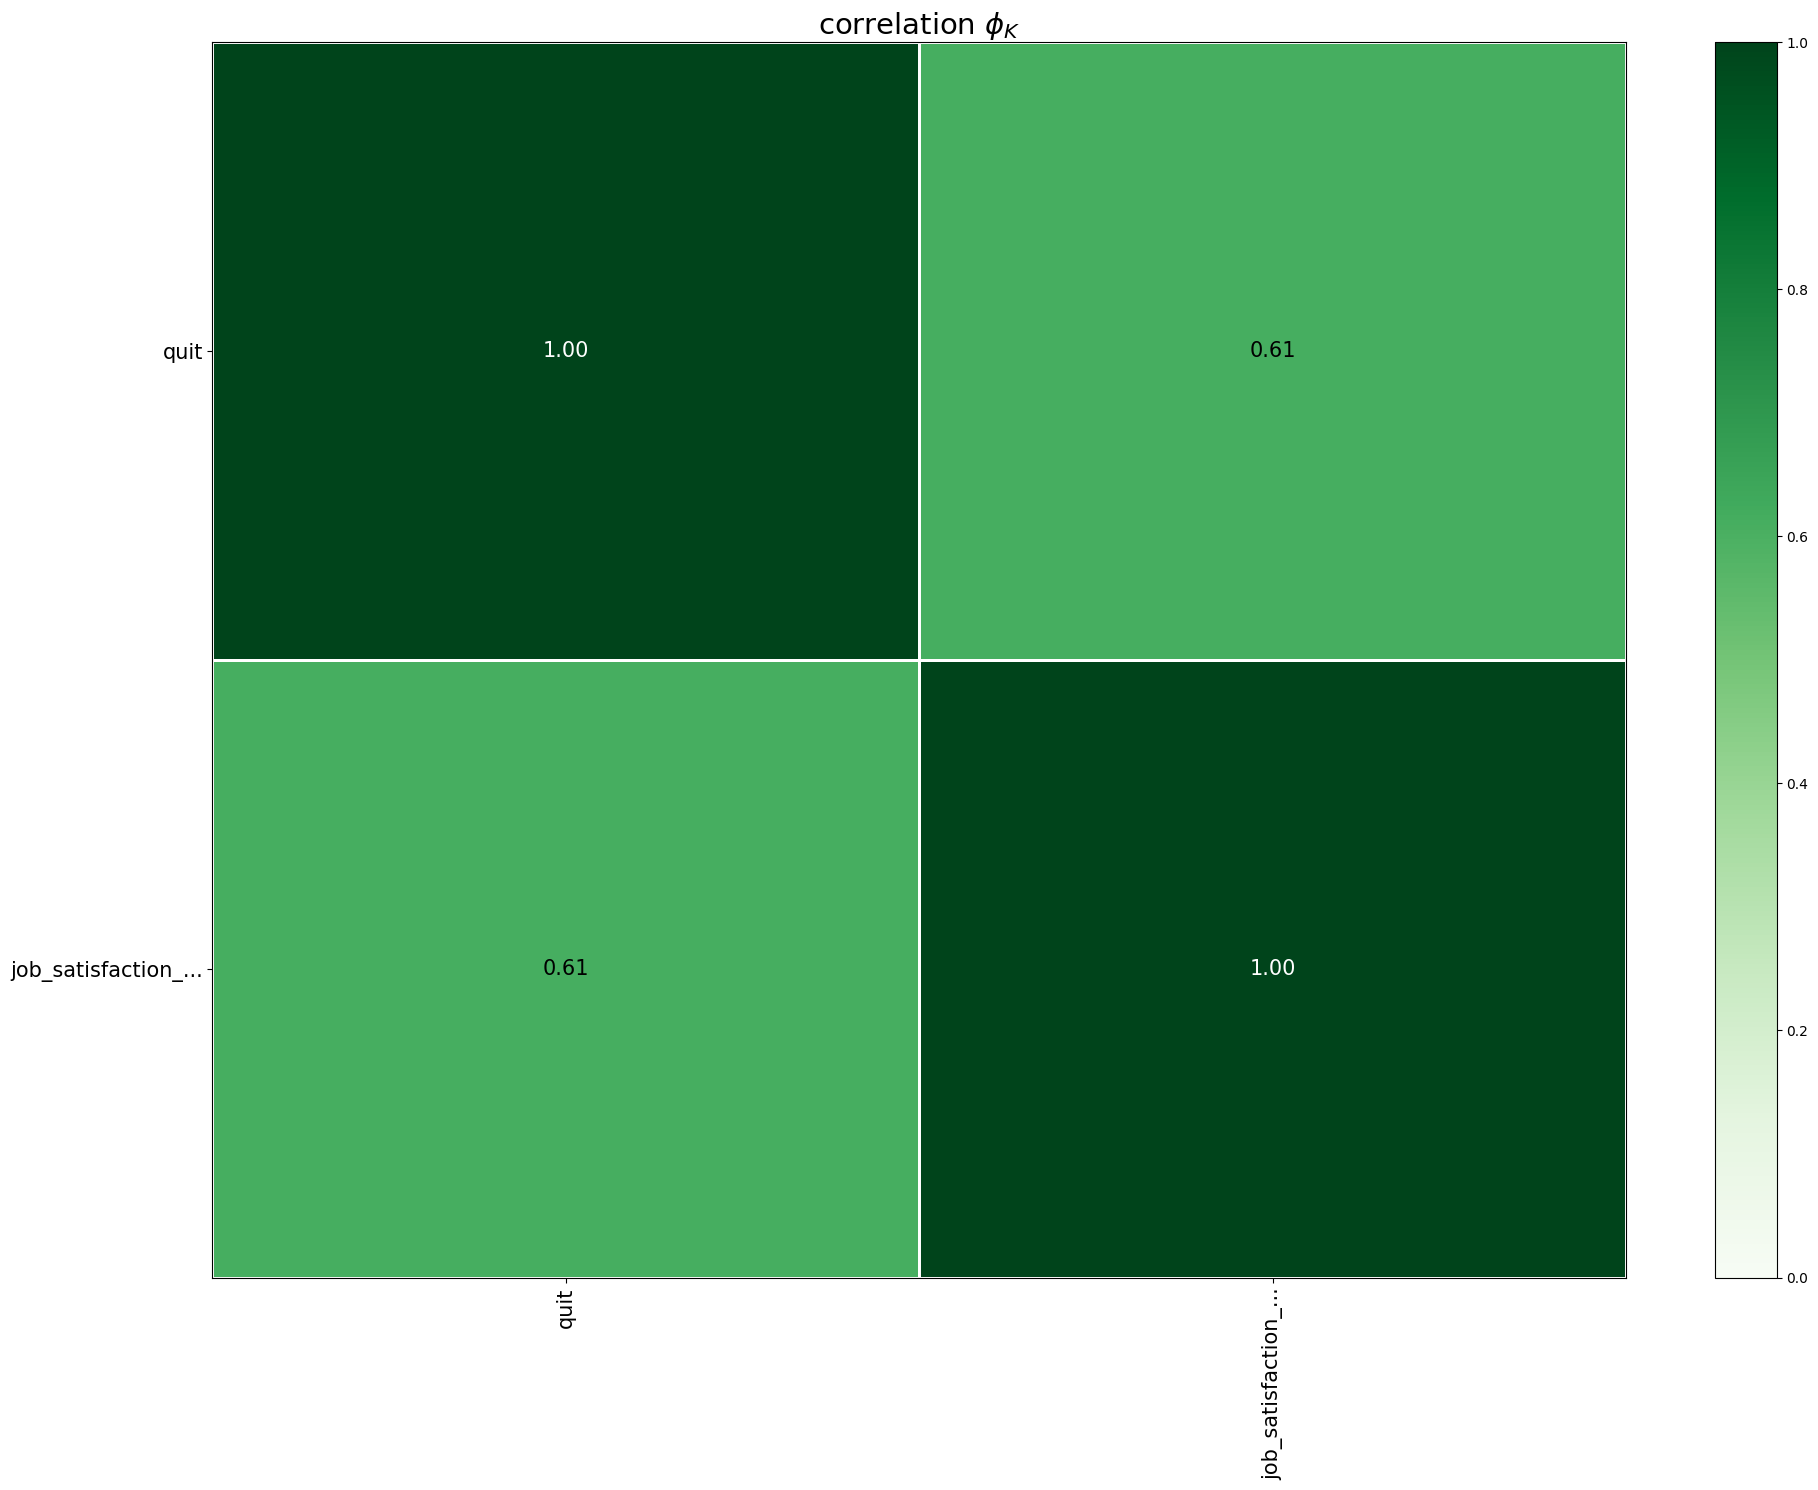

In [ ]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

The correlation coefficient is 0.61-significant, this feature can be used to train a model for predicting quit. We can add add the predictions of the first model to X_test and get the predictions of the quit

In [ ]:
X_test['job_satisfaction_rate_pred'] = randomized_search.best_estimator_.predict(X_test)
X_test.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate_pred
0,485046,marketing,junior,medium,2,no,no,5,28800,0.834828
1,686555,hr,junior,medium,1,no,no,4,30000,0.678750
2,467458,sales,middle,low,5,no,no,4,19200,0.671818
3,418655,sales,middle,low,6,no,no,4,19200,0.681875
4,789145,hr,middle,medium,5,no,no,5,40800,0.816098


In [ ]:
data_train2['job_satisfaction_rate_pred'] = randomized_search.best_estimator_.predict(data_train2.drop(['quit'], axis=1))

In [ ]:
data_train2.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate_pred
0,723290,sales,middle,high,2,no,no,4,54000,no,0.653659
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.834828
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.375714
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.340000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.789444


*DATA PREPARATION*

In the second task, we have to solve the classification problem - predicting the probability of employee quit. The following models are suitable for this task: logistic regression, KNN, support vector classification and decision tree classification. As a metric we take ROC-AUC with a success criterion greater than or equal to 91% on the test sample.

Just like for the first task, we will connect the test dataframe by id and divide it again. Since information about the department during the research analysis did not add anything to the portrait of the resigned employee, we will not include it in the model.

In [ ]:
test_all_1 = X_test.merge(y_test2, on = 'id')
test_all_1.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate_pred,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,0.834828,no
1,686555,hr,junior,medium,1,no,no,4,30000,0.678750,no
2,467458,sales,middle,low,5,no,no,4,19200,0.671818,no
3,418655,sales,middle,low,6,no,no,4,19200,0.681875,no
4,789145,hr,middle,medium,5,no,no,5,40800,0.816098,no


In [ ]:
X_test2 = test_all_1.drop(['quit', 'dept', 'id'], axis=1)

In [ ]:
X_test2.head()

,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate_pred
0,junior,medium,2,no,no,5,28800,0.834828
1,junior,medium,1,no,no,4,30000,0.678750
2,middle,low,5,no,no,4,19200,0.671818
3,middle,low,6,no,no,4,19200,0.681875
4,middle,medium,5,no,no,5,40800,0.816098


In [ ]:
y_test2 = test_all_1['quit']
y_test2.head()

0    no
1    no
2    no
3    no
4    no
Name: quit, dtype: object

check the training set for duplicates and remove them

In [ ]:
train_temp1 = data_train2.drop(['id'], axis=1)
print('the number of duplicates:',train_temp1.duplicated().sum())

the number of duplicates: 1413


In [ ]:
train_temp1 = train_temp1.drop_duplicates().reset_index(drop=True)

In [ ]:
X_train2 = train_temp1.drop(['quit', 'dept'], axis=1)
y_train2 = train_temp1['quit']
X_train2.shape

(2587, 8)

In [ ]:
label_encoder = LabelEncoder ()
label_encoder.fit(y_train2)
y_train = label_encoder.transform(y_train2)
y_test = label_encoder.transform(y_test2)

In [ ]:
ohe_cols = ['last_year_promo', 'last_year_violations']

In [ ]:
ordered_cols = ['level', 'workload']

In [ ]:
num_cols = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate_pred']

In [ ]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe',
            OneHotEncoder(drop='first', handle_unknown='error')
        )
    ]
)

In [ ]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                   ['junior', 'middle', 'sinior'],
                   ['low', 'medium', 'high'],
                ],
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [ ]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_cols),
        ('ord', ord_pipe, ordered_cols),
        ('num', MinMaxScaler(), num_cols)
    ],
    remainder='passthrough'
)

*PIPELINE*

In [ ]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [ ]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(6,14),
        'models__max_features': range(6,14),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1,7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
       'models__C': range(1,6),
       'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [SVC(kernel = 'rbf', gamma = 0.01)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    }
                  ]

In [ ]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [ ]:
randomized_search.fit(X_train2, y_train2)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                SimpleImpu...
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 6),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(gamma=0.01)],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler()]}],
                   random_state=42, scoring='roc_auc')

In [ ]:
print ('The best model and its parameters:\n', randomized_search.best_estimator_)
print ('roc_auc_score of the best model on cross-validation:', randomized_search.best_score_)

The best model and its parameters:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                    

Print the best metric values ​​of all models

In [ ]:
res1 = pd.DataFrame(randomized_search.cv_results_)
res1 = res1.drop (['mean_fit_time','std_fit_time','mean_score_time',
                 'std_score_time','params','split0_test_score','split1_test_score',
                 'split2_test_score','split3_test_score','split4_test_score','std_test_score'], axis=1)
res1

,param_preprocessor__num,param_models__max_features,param_models__max_depth,param_models,mean_test_score,rank_test_score
0,StandardScaler(),9,6,"DecisionTreeClassifier(max_depth=6, max_featur...",0.887476,1
1,passthrough,13,11,"DecisionTreeClassifier(max_depth=6, max_featur...",0.827629,7
2,StandardScaler(),11,6,"DecisionTreeClassifier(max_depth=6, max_featur...",0.887476,1
3,MinMaxScaler(),7,11,"DecisionTreeClassifier(max_depth=6, max_featur...",0.821575,9
4,StandardScaler(),9,12,"DecisionTreeClassifier(max_depth=6, max_featur...",0.808881,10
5,StandardScaler(),7,9,"DecisionTreeClassifier(max_depth=6, max_featur...",0.849209,5
6,StandardScaler(),8,11,"DecisionTreeClassifier(max_depth=6, max_featur...",0.827292,8
7,passthrough,13,9,"DecisionTreeClassifier(max_depth=6, max_featur...",0.847912,6
8,StandardScaler(),13,7,"DecisionTreeClassifier(max_depth=6, max_featur...",0.870279,3
9,MinMaxScaler(),6,7,"DecisionTreeClassifier(max_depth=6, max_featur...",0.869722,4


In [ ]:
y_test_proba = randomized_search.predict_proba(X_test2)[:,1]
print(f'ROC-AUC SCORE on test set: {roc_auc_score(y_test2, y_test_proba)}')

ROC-AUC SCORE on test set: 0.9163357632509531


The best model is DecisionTreeClassifier with hyperparameters max_depth=6, max_features=9, ROC-AUC на тренировочной выборке 88,7%, на тестовой 91.6% - meets the success criterion.
Also, for both tasks DecisionTree is the best model due to the fairly high flexibility of the model, the large number of hyperparameters, this model performs especially well in datasets with a large number of categorical features (in these tasks, half of the features are categorical).

Evaluation of the contribution the features

In [ ]:
X_train_transformed = pipe_final.named_steps['preprocessor'].fit_transform(X_train2)
X_test_transformed = pipe_final.named_steps['preprocessor'].transform(X_test2)

PermutationExplainer explainer: 2001it [00:40, 41.54it/s]


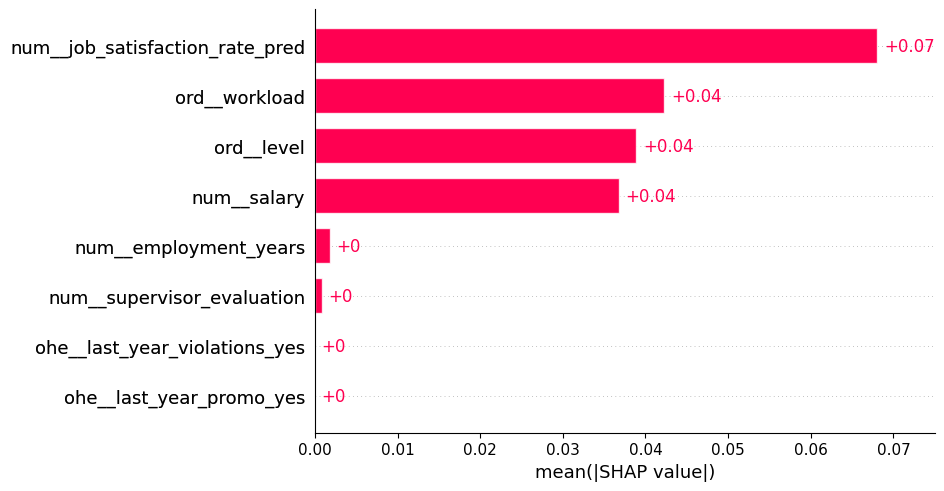

In [ ]:
explainer = shap.PermutationExplainer(randomized_search.best_estimator_.named_steps['models'].predict_proba, X_test_transformed)
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
explainer.feature_names = feature_names
shap_values_ = explainer(X_test_transformed)
shap.plots.bar(shap_values_[:,:,1])

 The most significant features, that model included in calculation are: the level of job satisfaction, employee workload, level, salary, less important are  employment years and supervisor evaluation.

**General conclusion**

the data and libraries were loaded, the function for plotting graphs was preset, general information about the datasets was assessed, the presence of a small number of gaps and the absence of duplicates was determined, data entry errors and data type mismatches were not detected.
An exploratory data analysis was carried out, the statistical distribution of quantitative characteristics and the distribution of qualitative characteristics were assessed. It has been established that the duration of work of employees in the company varies in the range of 1-10 years with a median of 3 years, the median rating of the quality of work of employees on a scale of 1-5 was 4 - a rather high rating. The mean salary of employees is 34000, the vast majority of employees earn less than 75000. The mean satisfaction_rate of emoloees amount 0.53. More thaт one third of employees work in sales department, the smallest part in HR. Almost half of employees work on junior positions, every tenth is on senior position. More than 50% have a middle workload, 30% -low. Only 3% of workers got promotion during last year, at the same time 14% got fines.

The level of job satisfaction correlates with the assessment of job quality (a satisfaction level of more than 0.8 was shown by employees with a job quality assessment of 4-5), the presence of penalties (the maximum level of satisfaction was achieved only among employees without penalties) and the duration of work in the company (the maximum level of satisfaction is shown by employees who have worked in the company for 5 years or more), the correlation with salary and the presence of an increase in the previous year is quite weak, with other indicators it is almost zero.

To predict employee job satisfaction we used a pipeline that included linear regression and a decision tree regressor. The hyperparameters of the models are specified. The metric used is smape (specified by the function) with a success criterion of less than or equal to 15%. The best model turned out to be DecisionTreeRegressor(max_depth=12, min_samples_leaf=7). The metric of the best model on the training set: 15.9%, on the test set 14.5%.

We composed a portrait of resigned employee, it can be described as follows: an employee who has worked for a short time in the company (1-3 years), with junior level, low salary, average rating from the employer, low workload, has not had promotions and may have had penalties.

To predict a probability of quit the following models were selected: logistic regression, KNN, support vector machine and decision tree. The metric used is ROC-AUC with a success criterion greater than or equal to 91% on the test sample.
The best model is DecisionTreeClassifier with hyperparameters max_depth=6, max_features=9, ROC-AUC on the cross-validation is 88,7%, on the test set 91.6% - meets the success criterion. Also, for both tasks DecisionTree is the best model due to the fairly high flexibility of the model, the large number of hyperparameters, this model performs especially well in datasets with a large number of categorical features (in these tasks, half of the features are categorical).

The contribution of features to obtaining a prediction is assessed. Among the most significant characteristics, the model included are the employee workload, his level, salary and level of job satisfaction.

Thus, in order to retain valuable employees in the company, we can recommend that the business maintain a high level of employee workload and increase salaries corresponding to this level, do not keep employees in junior positions longer than necessary, which will lead to increased job satisfaction and reduce the risk of quits.
